<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comaparison between Novel PID and Experiment_2 i.e Adaptive PID-Ada and classical PID

In [86]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

from decimal import Decimal, localcontext

In [87]:
def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [88]:
def grad_func_x1(x1):
  return 0.2*x1

In [89]:
def grad_func_x2(x2):
  return 4*x2

#Adaptive PID

In [90]:
def Adaptive_PID_Ada(lr = 0.05, Kd = 0.9):
  x1, x2 = -10, -10  #parametrs
  log = []  #list to store the value of x1 and x2 i.e learning process

  gamma =0.9 # momentum parameter
  eps = 1e-8

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  vt_x1, vt_x2, prev_vt_x1, prev_vt_x2 = 0,0,0,0  #Introducing for accumulating the magnitude of the gradient

  t = 0

  while(1):    #Until Convergence
    t +=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    vt_x1 = prev_vt_x1 + grad_x1*grad_x1  #Accumulating the magnitude of the gradient w.r.t first parameters
    mt_x1 = gamma*prev_mt_x1 + (lr*grad_x1)/math.sqrt(vt_x1 + eps)
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_grad_x1 = grad_x1
    prev_vt_x1 = vt_x1
    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1

    
    vt_x2 = prev_vt_x2 + grad_x2*grad_x2  #Accumulating the magnitude of the gradient w.r.t second parameters
    mt_x2 = gamma*prev_mt_x2 + (lr*grad_x2)/math.sqrt(vt_x2 + eps)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_grad_x2 = grad_x2
    prev_vt_x2 = vt_x2
    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log

#Static novel PID

In [91]:
def novel_PID_Nes(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 # parameters
  log = []  #list to store the value of x1 and x2 i.e learning 

  gamma =0.9 # momentum parameter
  eps = 1e-8

  prev_x1, prev_x2 = x1, x2
  grad_x1, grad_x2 = 0,0
  vt_x1, dt_x1, vt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_vt_x1, prev_vt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  x1_look_ahead, x2_look_ahead = 0,0

  t = 0

  while(1):
    t+=1

    x1_look_ahead = x1 - gamma*prev_vt_x1
    x2_look_ahead = x2 - gamma*prev_vt_x2

    grad_x1 = grad_func_x1(x1_look_ahead)
    grad_x2 = grad_func_x2(x2_look_ahead)

    vt_x1 = gamma*prev_vt_x1 + (lr*grad_x1)
    vt_x2 = gamma*prev_vt_x2 + (lr*grad_x2)

    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_grad_x1 = grad_x1
    prev_grad_x2 = grad_x2

    prev_vt_x1 = vt_x1
    prev_vt_x2 = vt_x2

    prev_dt_x1 = dt_x1
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - vt_x1 - Kd*dt_x1
    x2 = x2 - vt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log

#Classical PID

In [92]:
def PID(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 #parameters
  gamma = 0.9	

  log = [] # lists to store learning process

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  t=0

  while(1):
    t=t+1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = gamma*prev_mt_x1 + lr*grad_x1
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1
    prev_grad_x1 = grad_x1

    mt_x2 = gamma*prev_mt_x2 + lr*grad_x2
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2
    prev_grad_x2 = grad_x2

    log.append((x1,x2))

    x1_prev = x1
    x2_prev = x2

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1_prev == x1 and x2_prev == x2):
      break

  return x1, x2, log

#Comparison

In [93]:
x1, x2, log_1 = Adaptive_PID_Ada(lr=0.01, Kd=4)
x1, x2, log_2 = novel_PID_Nes(lr=0.01, Kd=4)
x1, x2, log_3 = PID(lr=0.01, Kd=4)

In [94]:
#x1, x2, log_1 = Adaptive_PID_Ada(lr=0.01, Kd=5)
#x1, x2, log_2 = novel_PID_Nes(lr=0.01, Kd=5)
#x1, x2, log_3 = PID(lr=0.01, Kd=5) #Not converging also.

*  For larger value of Kd=5 Adaptive PID is not converging.
*  Novel PID is also not converging.

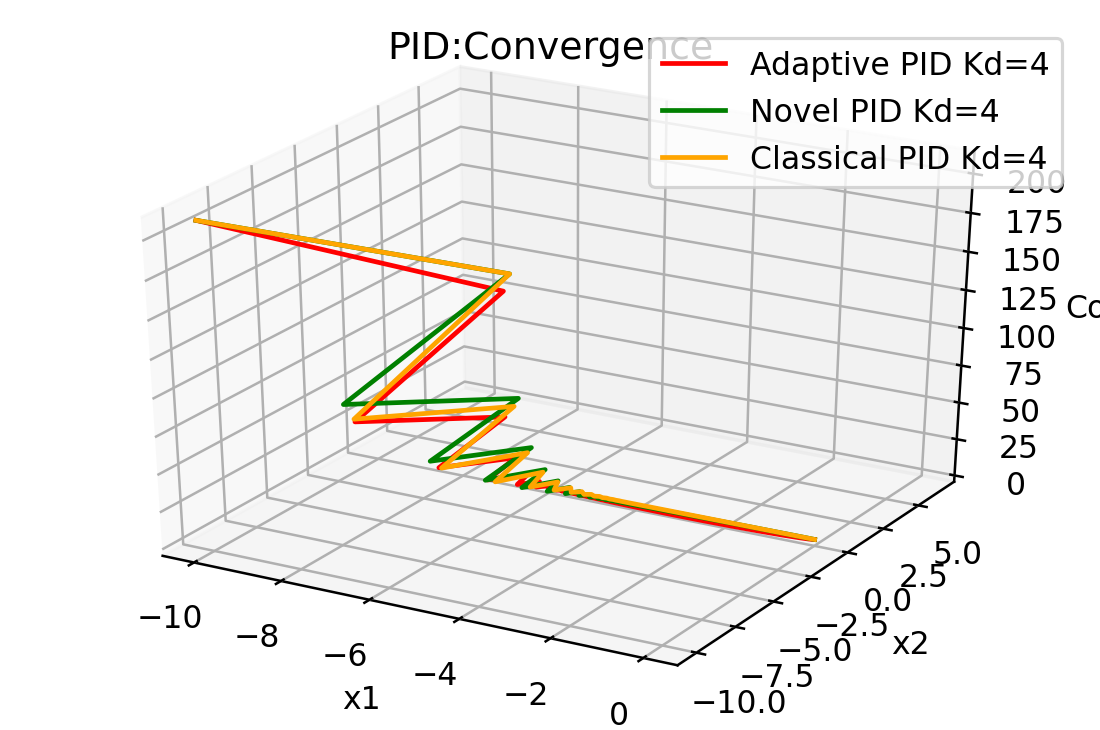

CPU times: user 6.13 s, sys: 831 ms, total: 6.96 s
Wall time: 6.05 s


In [95]:
%%time
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]
costs_1 = np.array([func(x_1, y_1) for x_1, y_1 in zip(x_1, y_1)])

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]
costs_2 = np.array([func(x_2, y_2) for x_2, y_2 in zip(x_2, y_2)])

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]
costs_3 = np.array([func(x_3, y_3) for x_3, y_3 in zip(x_3, y_3)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('PID:Convergence')
ax.plot(x_1, y_1,costs_1, color='red', label='Adaptive PID Kd=4')
ax.plot(x_2, y_2,costs_2, color='green', label = 'Novel PID Kd=4')
ax.plot(x_3, y_3,costs_3, color='orange', label = 'Classical PID Kd=4')

plt.legend()
plt.show()

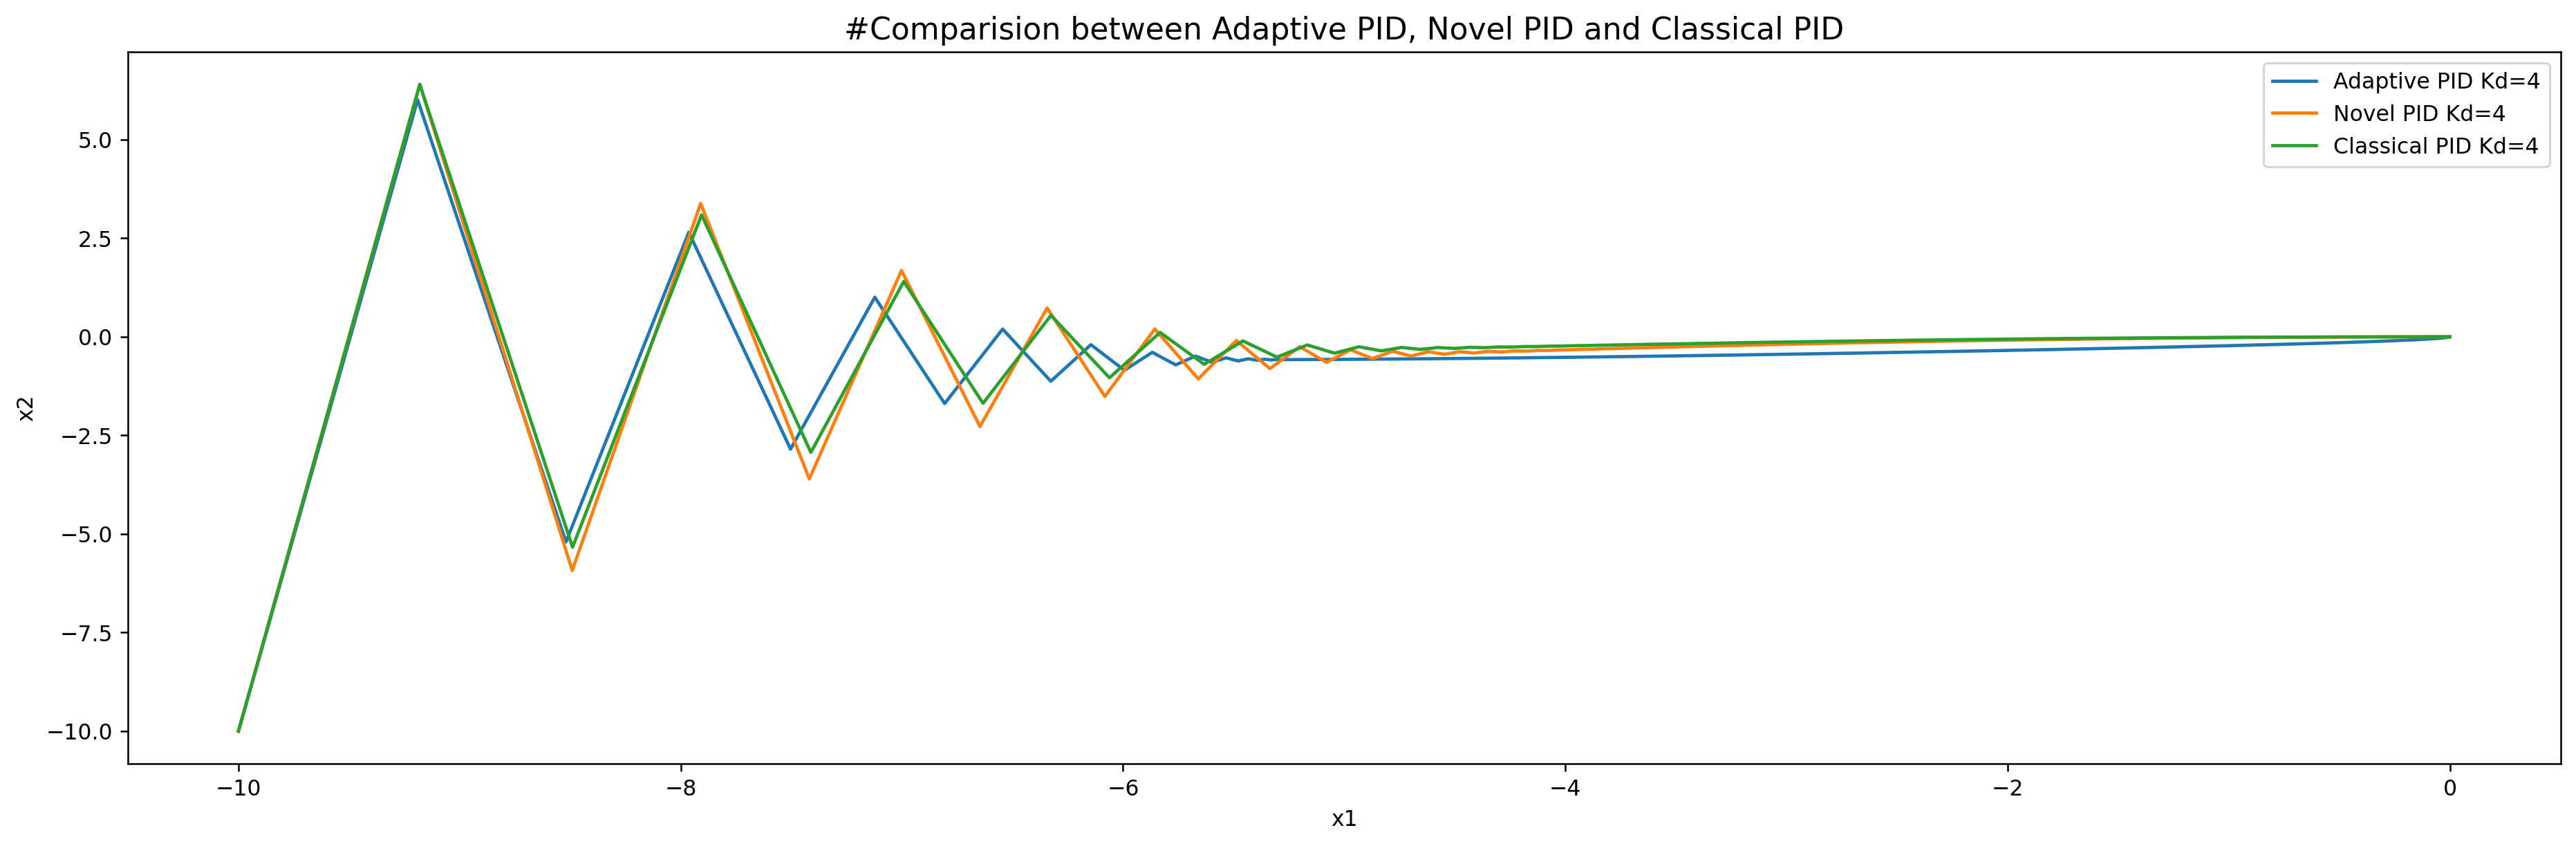

CPU times: user 4.63 s, sys: 17.9 ms, total: 4.65 s
Wall time: 4.67 s


In [96]:
%%time
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Adaptive PID, Novel PID and Classical PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_1,y_1, label='Adaptive PID Kd=4')
plt.plot(x_2,y_2, label='Novel PID Kd=4')
plt.plot(x_3,y_3, label='Classical PID Kd=4')

plt.legend()
plt.show()

*   Adaptive PID is performing well with Kd = 4.
*   Novel and Classical PID has almost same converganve rate.
*   But All have large overshoot for higher value of Kd.

In [97]:
x1, x2, log_1 = Adaptive_PID_Ada(lr=0.01, Kd=2)
x1, x2, log_2 = novel_PID_Nes(lr=0.01, Kd=2)
x1, x2, log_3 = PID(lr=0.01, Kd=2)

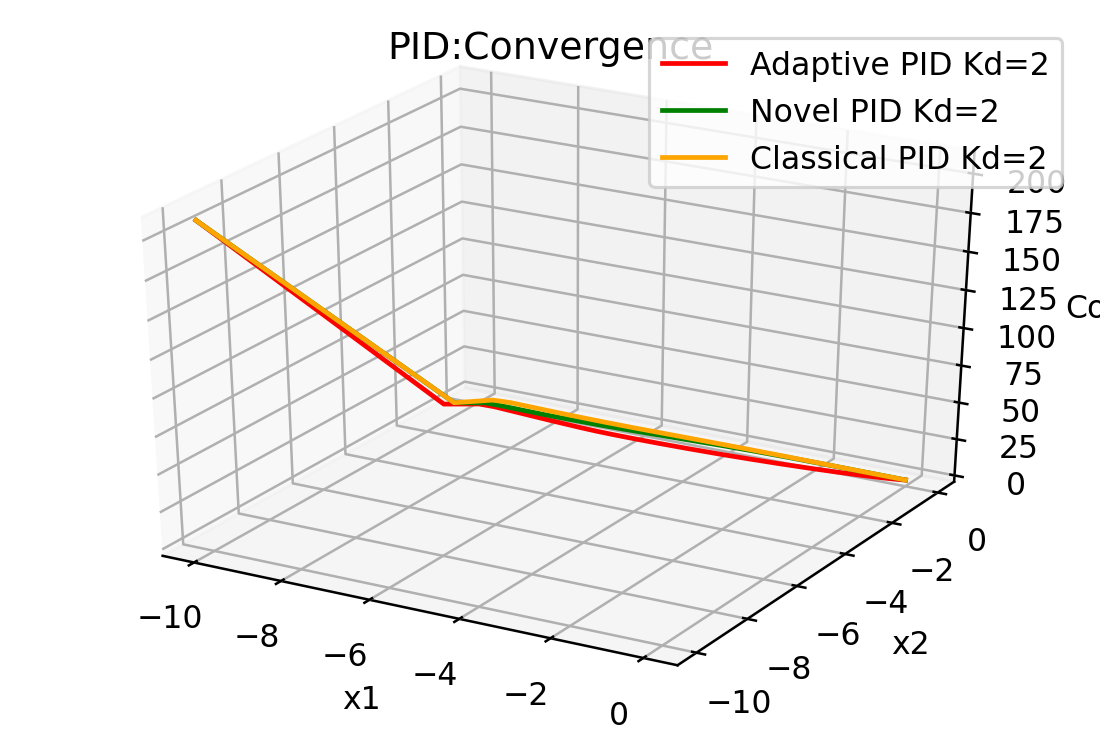

CPU times: user 4.47 s, sys: 661 ms, total: 5.13 s
Wall time: 4.43 s


In [98]:
%%time
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]
costs_1 = np.array([func(x_1, y_1) for x_1, y_1 in zip(x_1, y_1)])

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]
costs_2 = np.array([func(x_2, y_2) for x_2, y_2 in zip(x_2, y_2)])

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]
costs_3 = np.array([func(x_3, y_3) for x_3, y_3 in zip(x_3, y_3)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('PID:Convergence')
ax.plot(x_1, y_1,costs_1, color='red', label='Adaptive PID Kd=2')
ax.plot(x_2, y_2,costs_2, color='green', label = 'Novel PID Kd=2')
ax.plot(x_3, y_3,costs_3, color='orange', label = 'Classical PID Kd=2')

plt.legend()
plt.show()

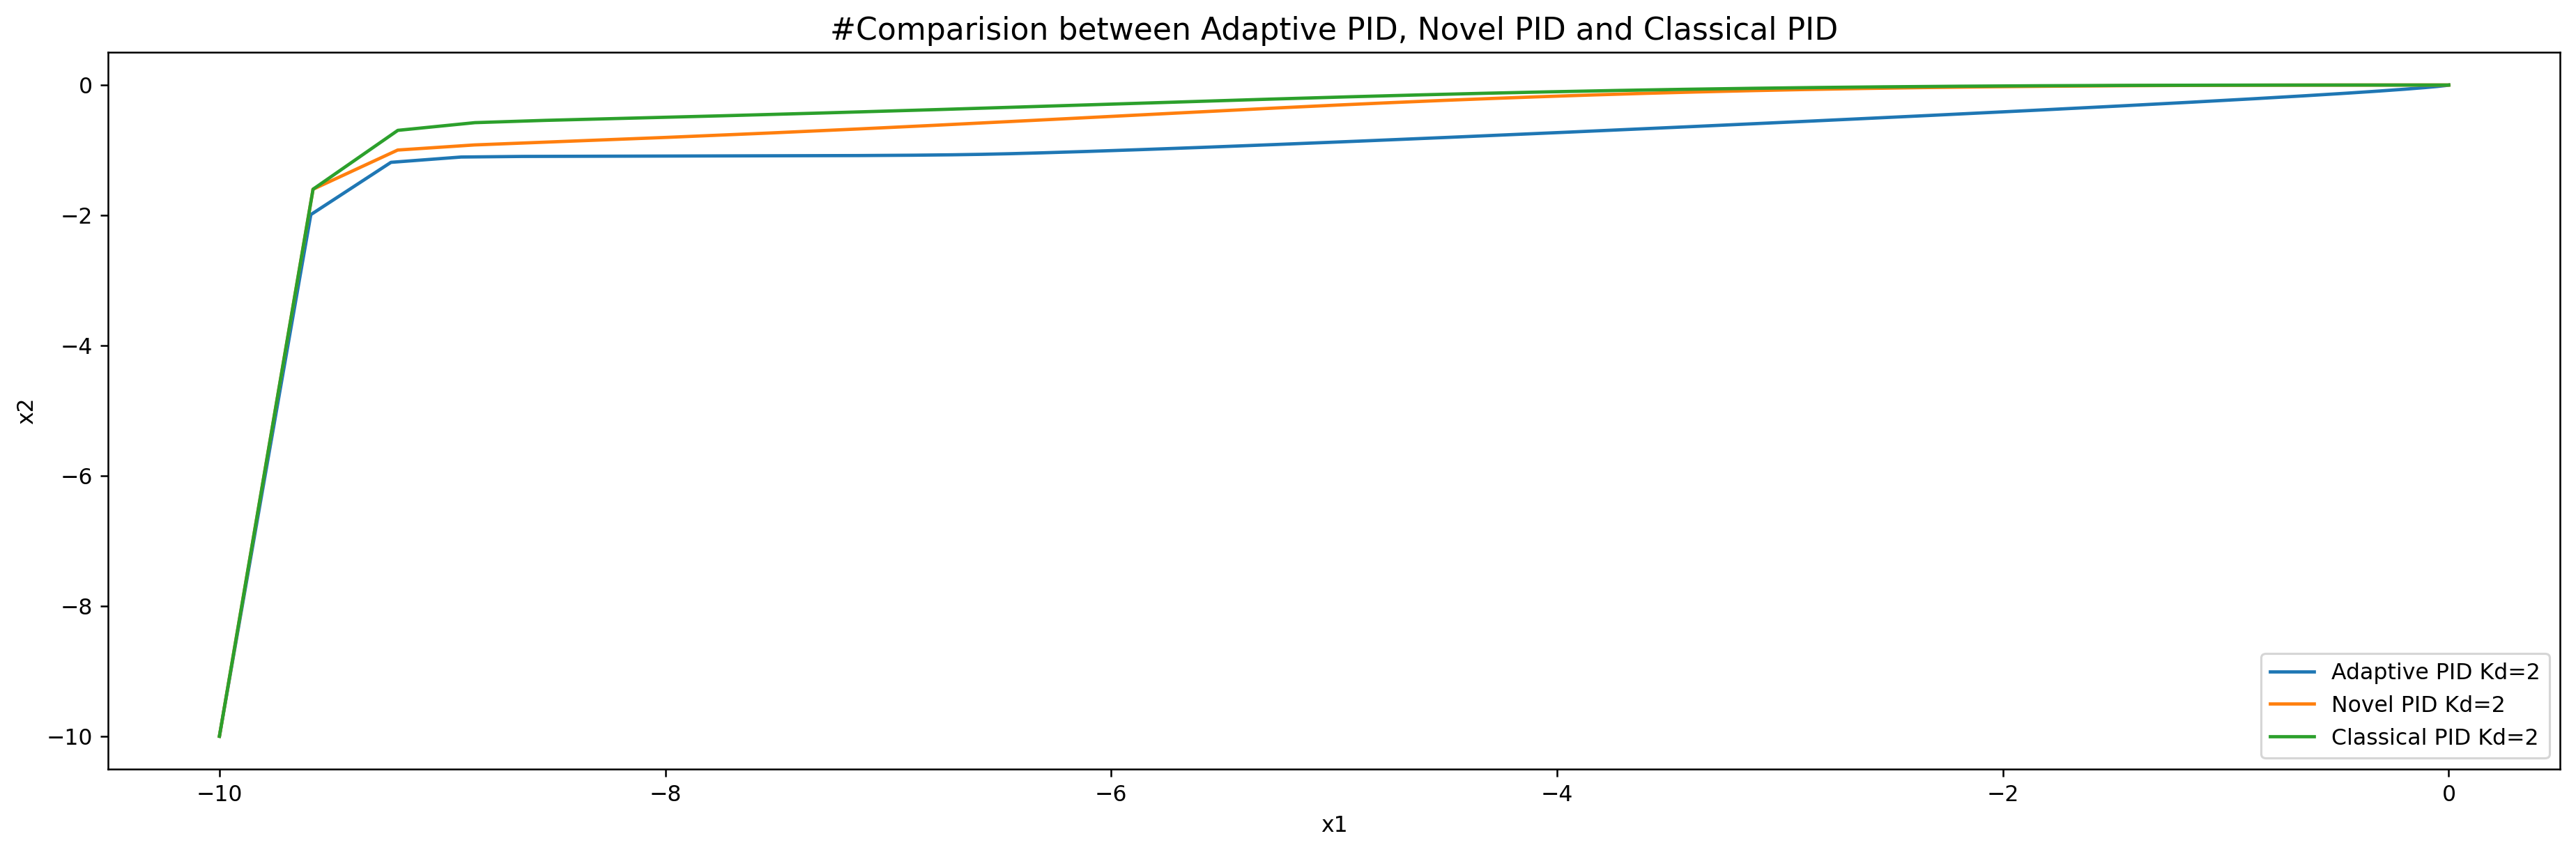

CPU times: user 4.93 s, sys: 22.9 ms, total: 4.95 s
Wall time: 4.97 s


In [99]:
%%time
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Adaptive PID, Novel PID and Classical PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_1,y_1, label='Adaptive PID Kd=2')
plt.plot(x_2,y_2, label='Novel PID Kd=2')
plt.plot(x_3,y_3, label='Classical PID Kd=2')

plt.legend()
plt.show()

In [100]:
x1, x2, log_1 = Adaptive_PID_Ada(lr=0.01, Kd=1)
x1, x2, log_2 = novel_PID_Nes(lr=0.01, Kd=1)
x1, x2, log_3 = PID(lr=0.01, Kd=1)

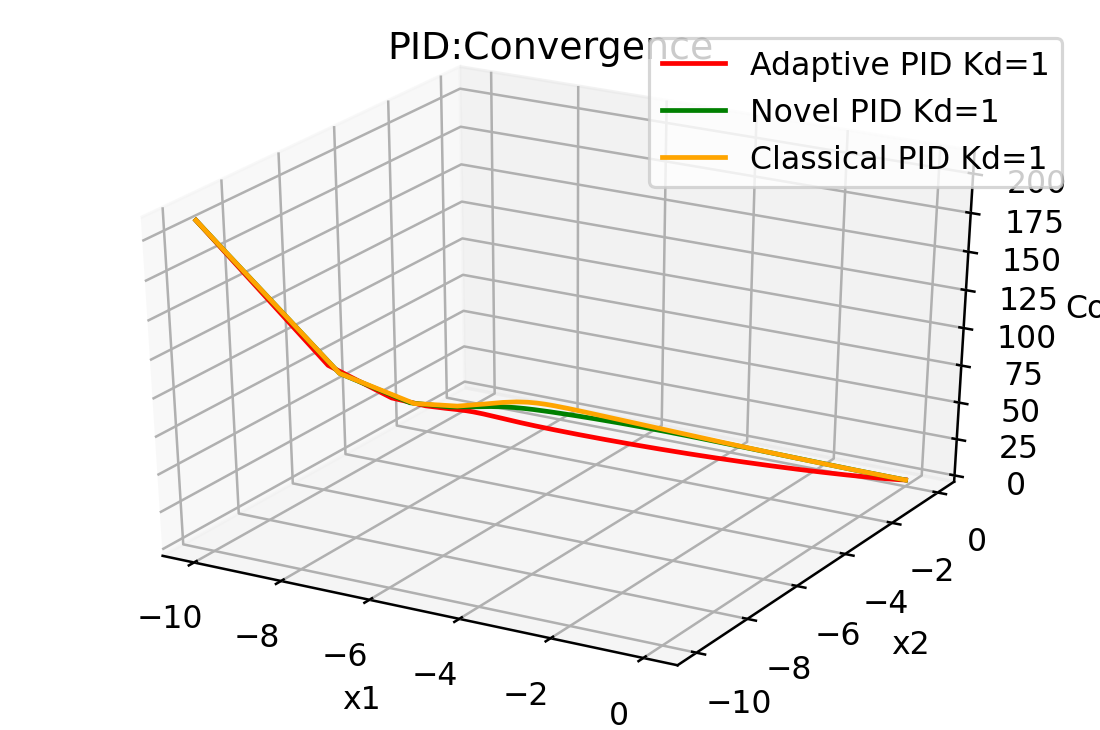

CPU times: user 4.06 s, sys: 602 ms, total: 4.66 s
Wall time: 4.02 s


In [101]:
%%time
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]
costs_1 = np.array([func(x_1, y_1) for x_1, y_1 in zip(x_1, y_1)])

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]
costs_2 = np.array([func(x_2, y_2) for x_2, y_2 in zip(x_2, y_2)])

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]
costs_3 = np.array([func(x_3, y_3) for x_3, y_3 in zip(x_3, y_3)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('PID:Convergence')
ax.plot(x_1, y_1,costs_1, color='red', label='Adaptive PID Kd=1')
ax.plot(x_2, y_2,costs_2, color='green', label = 'Novel PID Kd=1')
ax.plot(x_3, y_3,costs_3, color='orange', label = 'Classical PID Kd=1')

plt.legend()
plt.show()

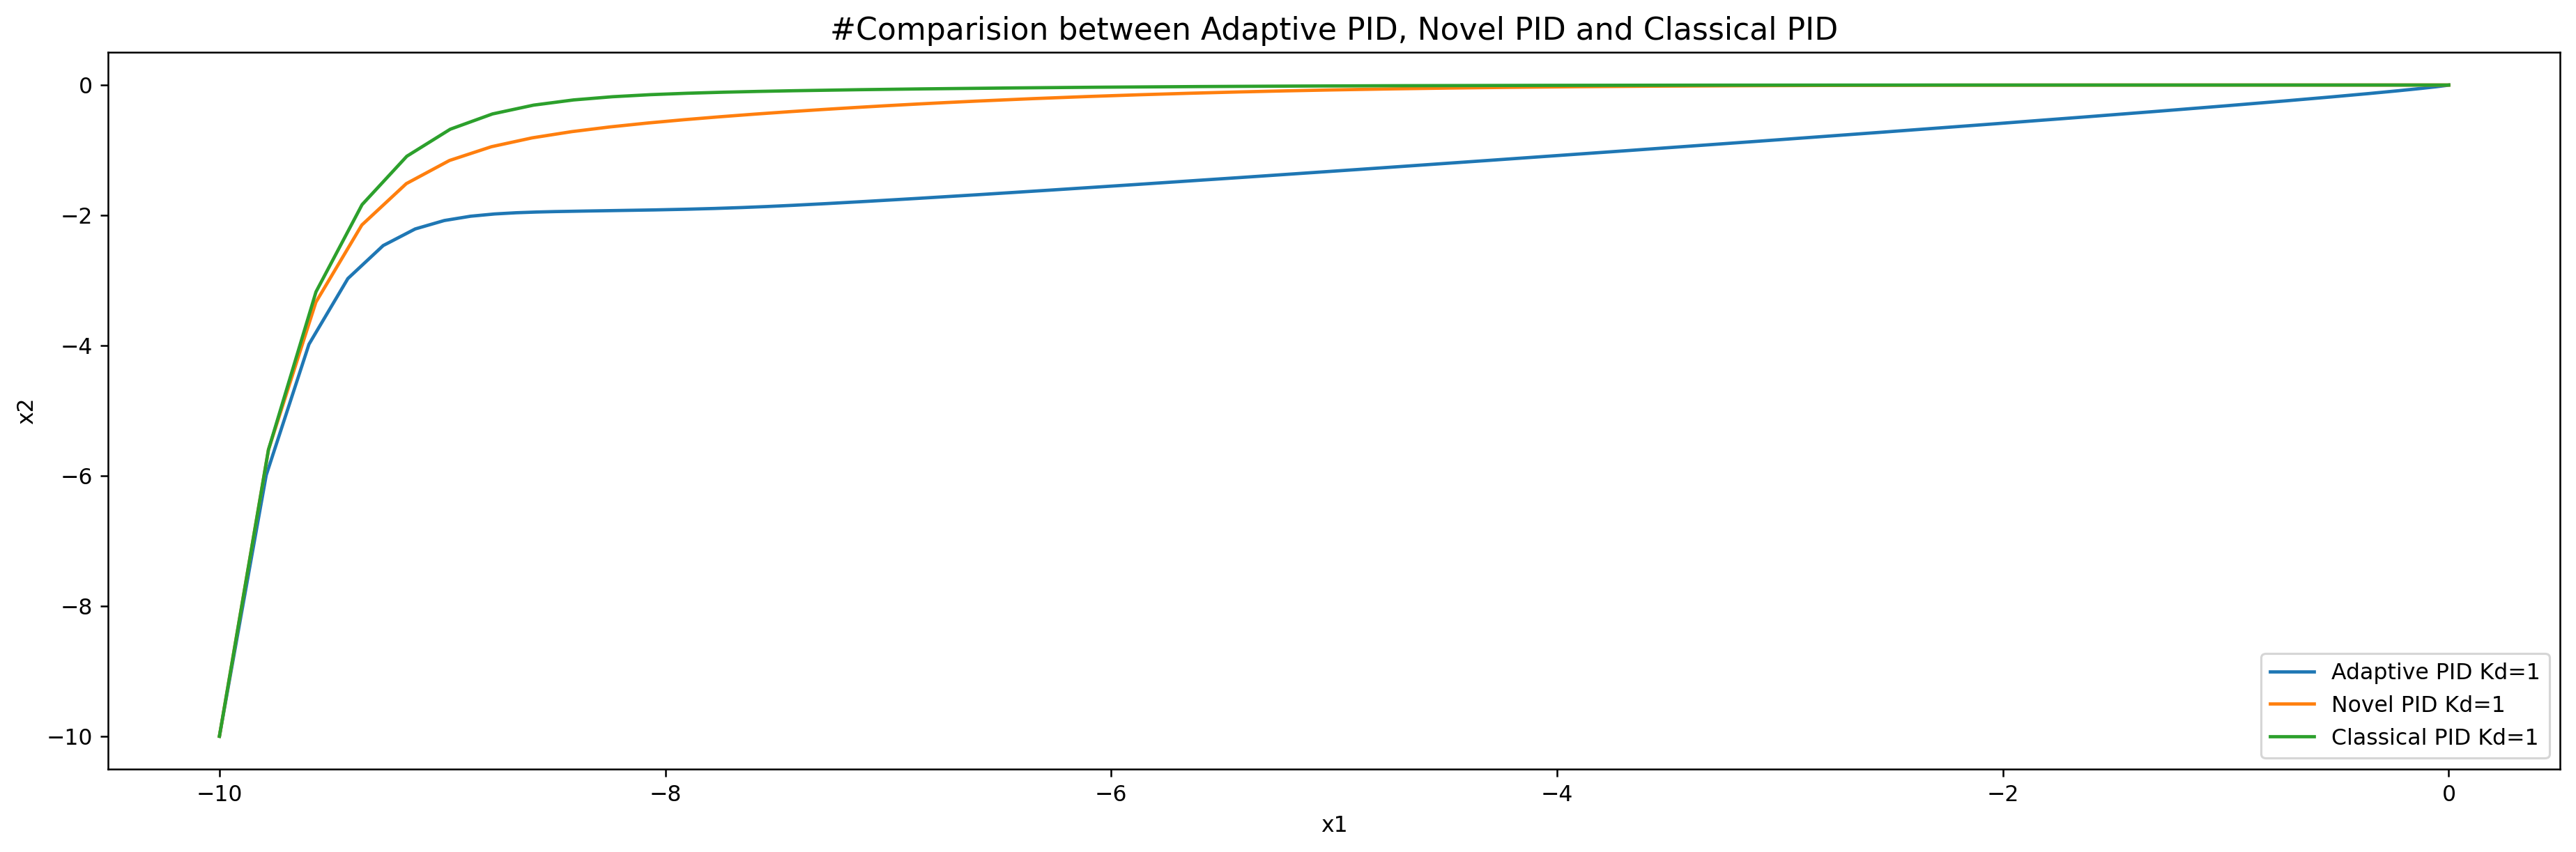

CPU times: user 4.77 s, sys: 23 ms, total: 4.79 s
Wall time: 4.8 s


In [102]:
%%time
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Adaptive PID, Novel PID and Classical PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_1,y_1, label='Adaptive PID Kd=1')
plt.plot(x_2,y_2, label='Novel PID Kd=1')
plt.plot(x_3,y_3, label='Classical PID Kd=1')

plt.legend()
plt.show()

In [103]:
x1, x2, log_1 = Adaptive_PID_Ada(lr=0.01, Kd=0.9)
x1, x2, log_2 = novel_PID_Nes(lr=0.01, Kd=0.9)
x1, x2, log_3 = PID(lr=0.01, Kd=0.9)

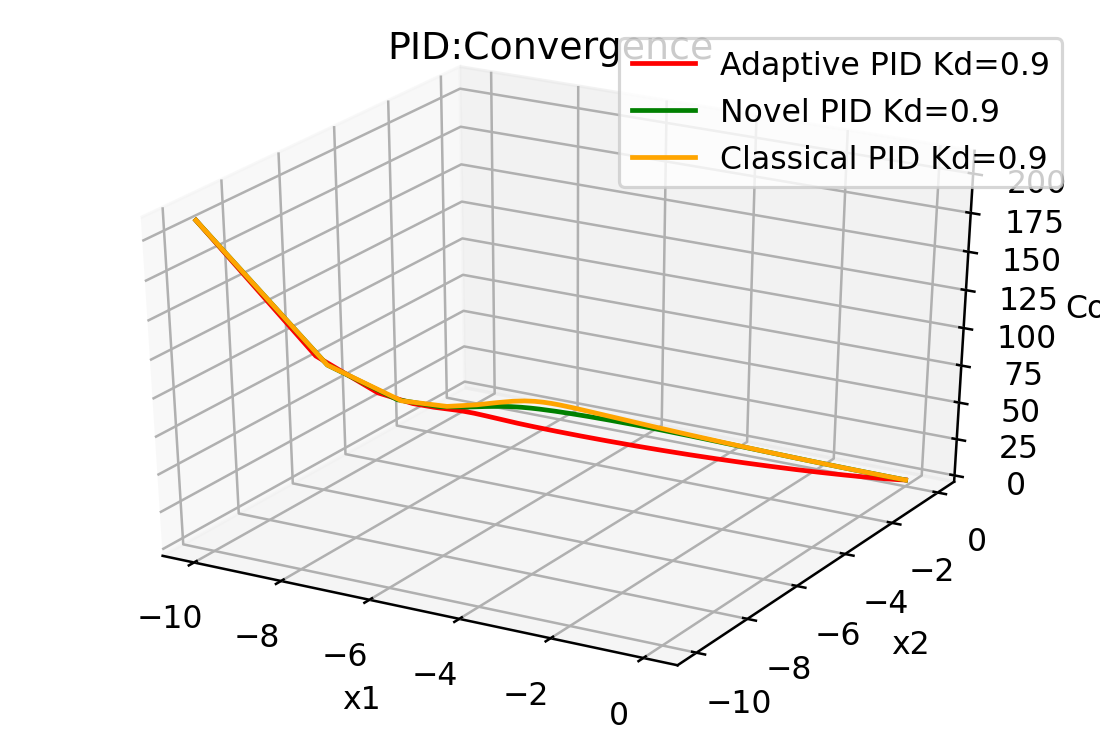

CPU times: user 4.03 s, sys: 599 ms, total: 4.63 s
Wall time: 3.97 s


In [104]:
%%time
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]
costs_1 = np.array([func(x_1, y_1) for x_1, y_1 in zip(x_1, y_1)])

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]
costs_2 = np.array([func(x_2, y_2) for x_2, y_2 in zip(x_2, y_2)])

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]
costs_3 = np.array([func(x_3, y_3) for x_3, y_3 in zip(x_3, y_3)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('PID:Convergence')
ax.plot(x_1, y_1,costs_1, color='red', label='Adaptive PID Kd=0.9')
ax.plot(x_2, y_2,costs_2, color='green', label = 'Novel PID Kd=0.9')
ax.plot(x_3, y_3,costs_3, color='orange', label = 'Classical PID Kd=0.9')

plt.legend()
plt.show()

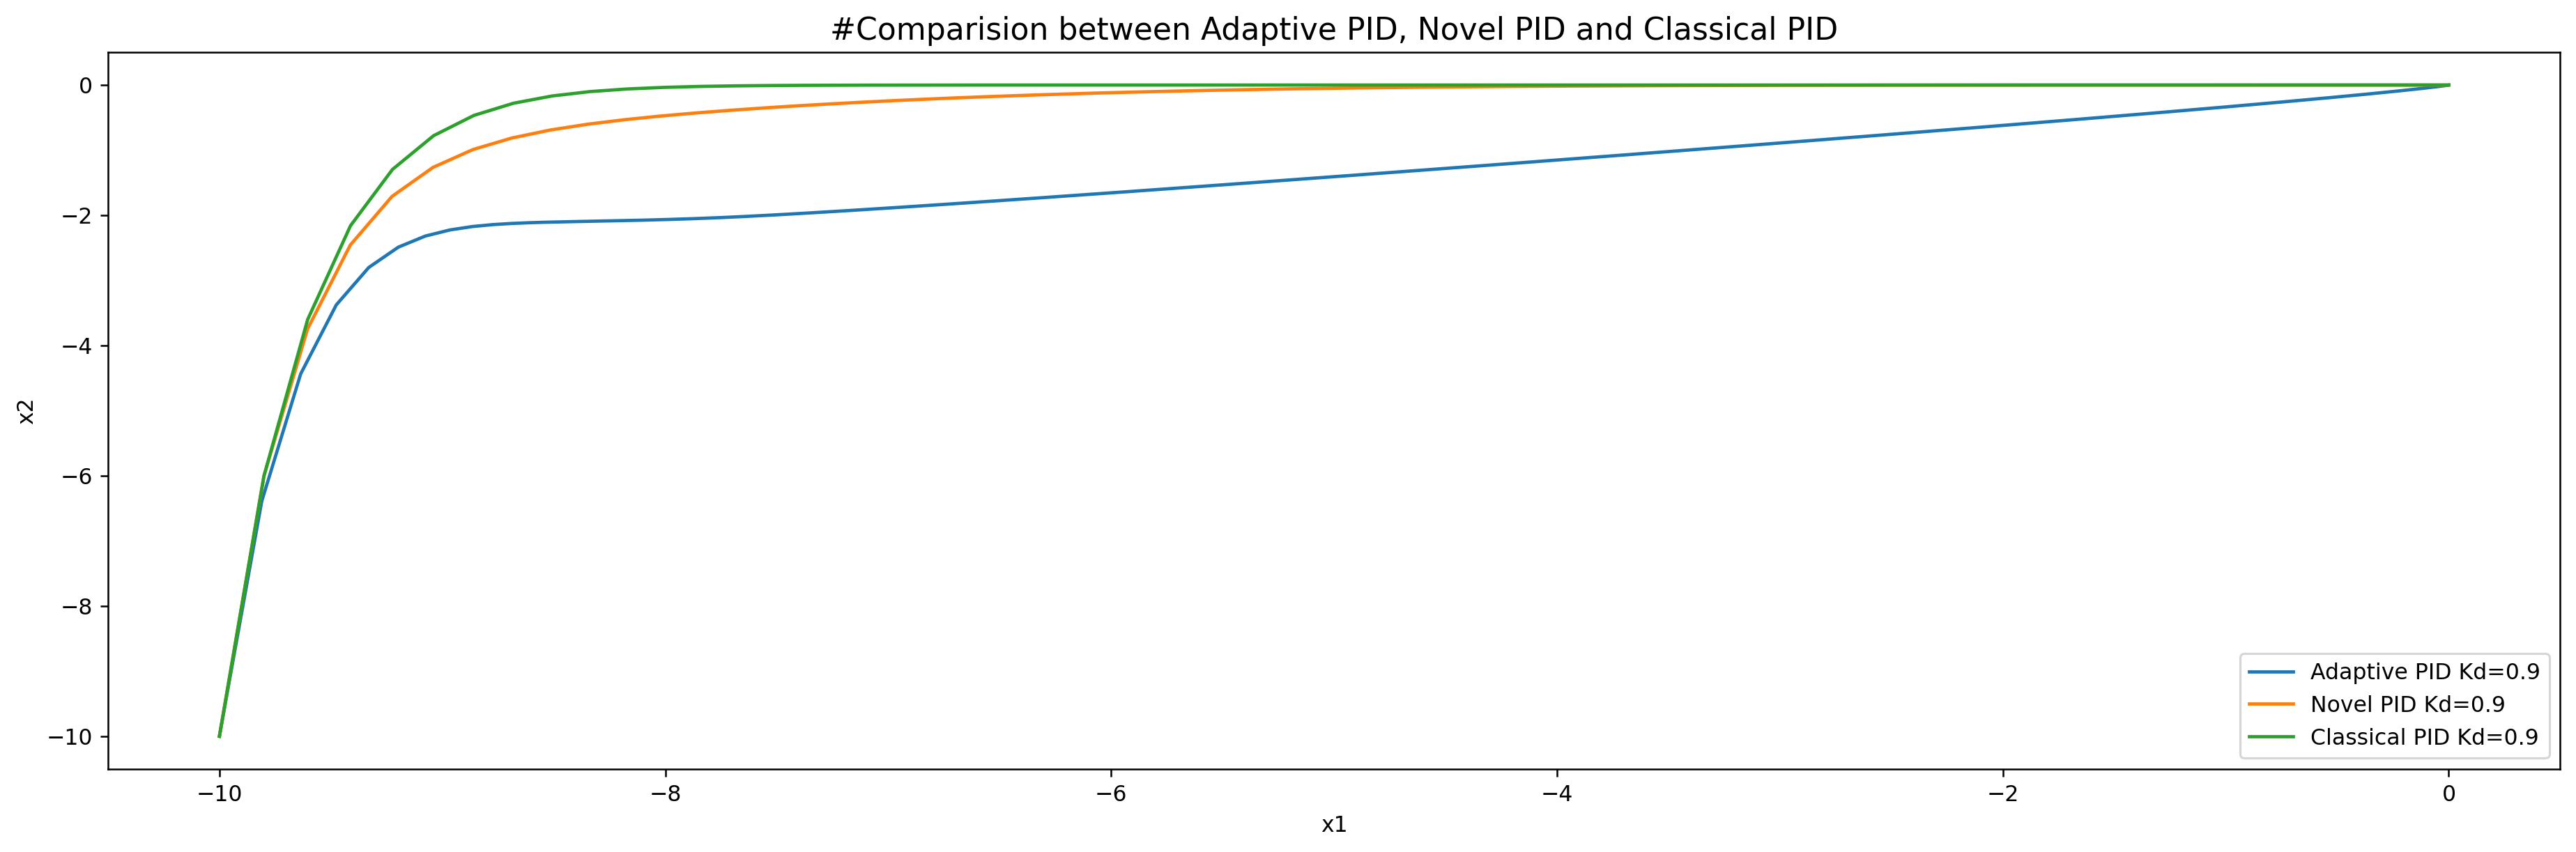

CPU times: user 4.65 s, sys: 21.7 ms, total: 4.68 s
Wall time: 4.7 s


In [105]:
%%time
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Adaptive PID, Novel PID and Classical PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_1,y_1, label='Adaptive PID Kd=0.9')
plt.plot(x_2,y_2, label='Novel PID Kd=0.9')
plt.plot(x_3,y_3, label='Classical PID Kd=0.9')

plt.legend()
plt.show()

In [106]:
#x1, x2, log_1 = Adaptive_PID_Ada(lr=0.01, Kd=0.6)
x1, x2, log_2 = novel_PID_Nes(lr=0.01, Kd=0.6)
x1, x2, log_3 = PID(lr=0.01, Kd=0.6)

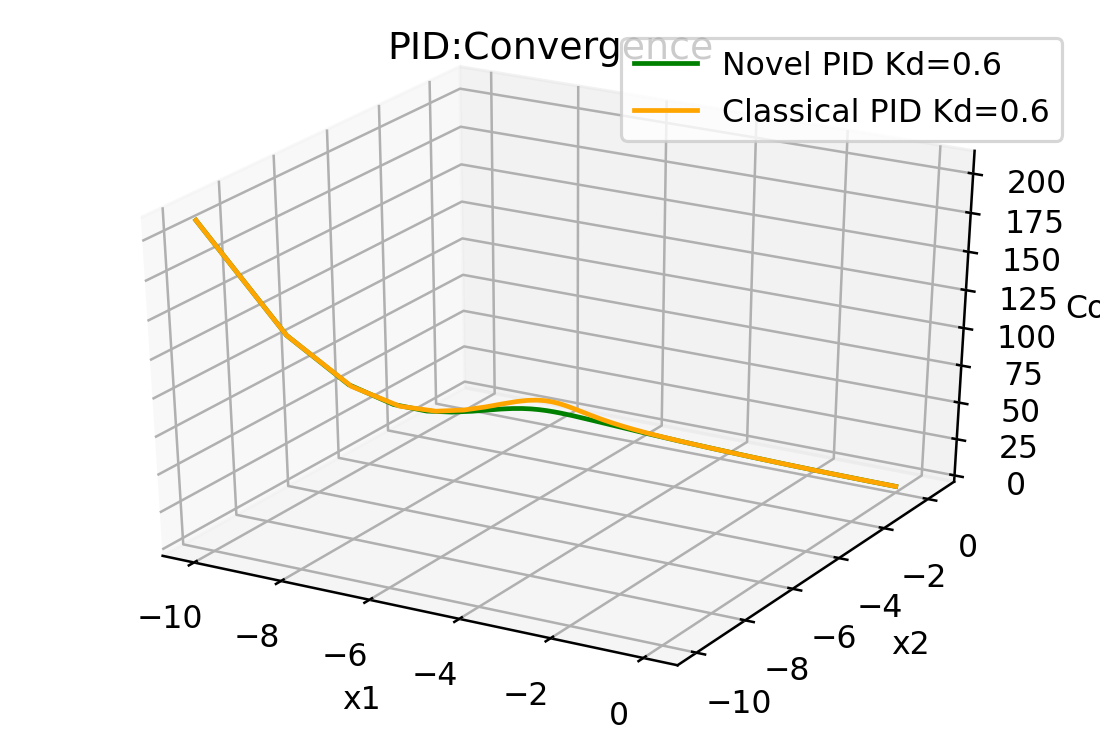

CPU times: user 590 ms, sys: 337 ms, total: 927 ms
Wall time: 560 ms


In [107]:
%%time
'''
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]
costs_1 = np.array([func(x_1, y_1) for x_1, y_1 in zip(x_1, y_1)])'''

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]
costs_2 = np.array([func(x_2, y_2) for x_2, y_2 in zip(x_2, y_2)])

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]
costs_3 = np.array([func(x_3, y_3) for x_3, y_3 in zip(x_3, y_3)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('PID:Convergence')
#ax.plot(x_1, y_1,costs_1, color='red', label='Adaptive PID Kd=0.6')
ax.plot(x_2, y_2,costs_2, color='green', label = 'Novel PID Kd=0.6')
ax.plot(x_3, y_3,costs_3, color='orange', label = 'Classical PID Kd=0.6')

plt.legend()
plt.show()

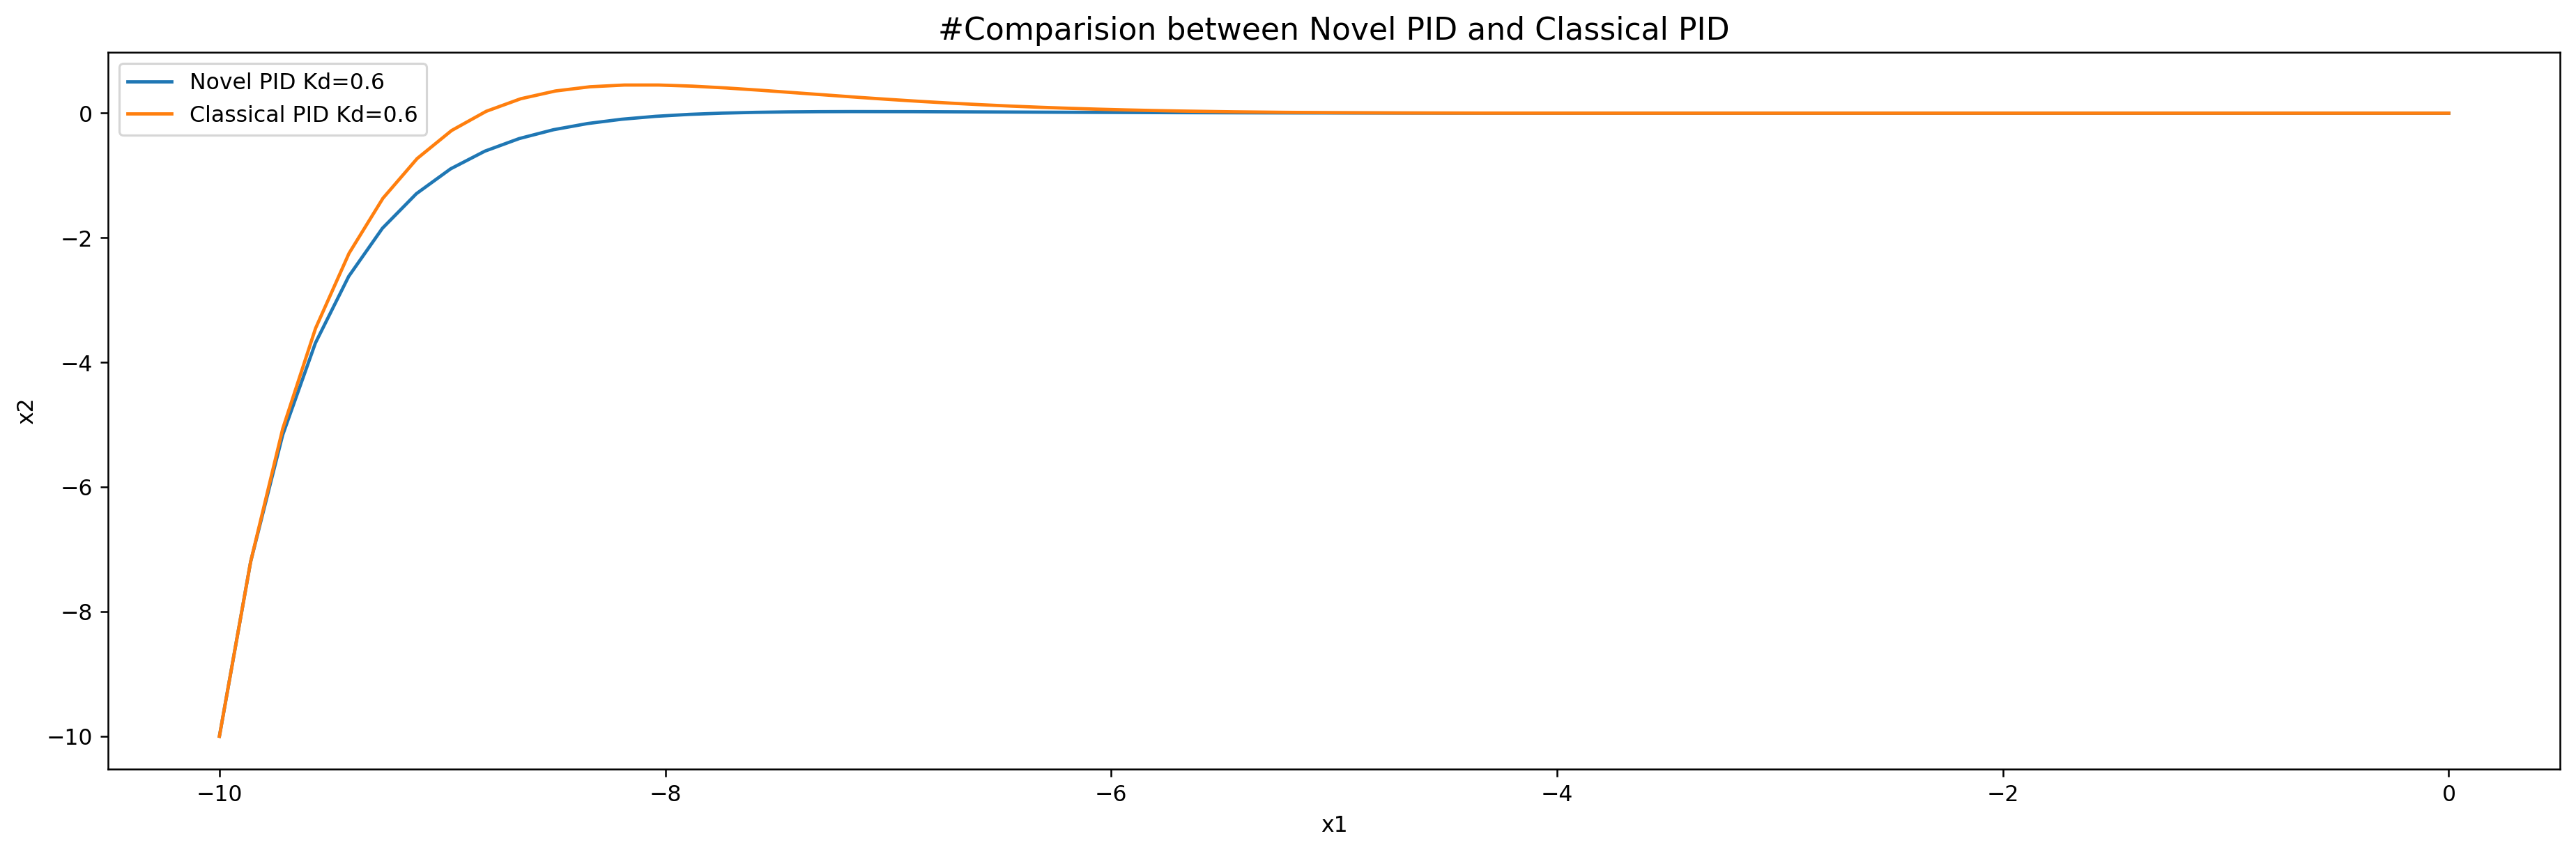

CPU times: user 892 ms, sys: 3.88 ms, total: 896 ms
Wall time: 906 ms


In [108]:
%%time
'''
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]'''

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Novel PID and Classical PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

#plt.plot(x_1,y_1, label='Adaptive PID Kd=0.6')
plt.plot(x_2,y_2, label='Novel PID Kd=0.6')
plt.plot(x_3,y_3, label='Classical PID Kd=0.6')

plt.legend()
plt.show()

In [109]:
#x1, x2, log_1 = Adaptive_PID_Ada(lr=0.01, Kd=0.6)
x1, x2, log_2 = novel_PID_Nes(lr=0.01, Kd=0.3)
#x1, x2, log_3 = PID(lr=0.01, Kd=0.3) #Not Converges 

In [110]:
x1, x2, log_21 = novel_PID_Nes(lr=0.01, Kd=0.1)
x1, x2, log_22 = novel_PID_Nes(lr=0.01, Kd=0.0)

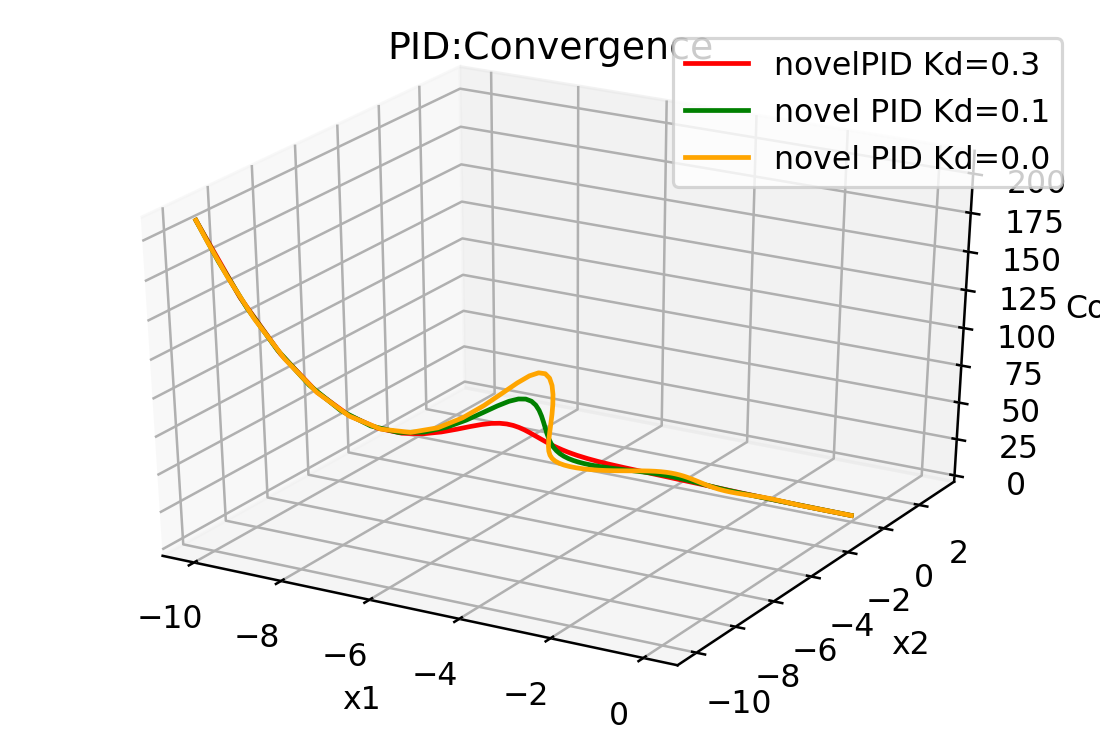

CPU times: user 652 ms, sys: 362 ms, total: 1.01 s
Wall time: 637 ms


In [111]:
%%time

x_1 = [l[0] for l in log_2]
y_1 = [l[1] for l in log_2]
costs_1 = np.array([func(x_1, y_1) for x_1, y_1 in zip(x_1, y_1)])

x_2 = [l[0] for l in log_21]
y_2 = [l[1] for l in log_21]
costs_2 = np.array([func(x_2, y_2) for x_2, y_2 in zip(x_2, y_2)])

x_3 = [l[0] for l in log_22]
y_3 = [l[1] for l in log_22]
costs_3 = np.array([func(x_3, y_3) for x_3, y_3 in zip(x_3, y_3)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('PID:Convergence')
ax.plot(x_1, y_1,costs_1, color='red', label='novelPID Kd=0.3')
ax.plot(x_2, y_2,costs_2, color='green', label = 'novel PID Kd=0.1')
ax.plot(x_3, y_3,costs_3, color='orange', label = 'novel PID Kd=0.0')

plt.legend()
plt.show()

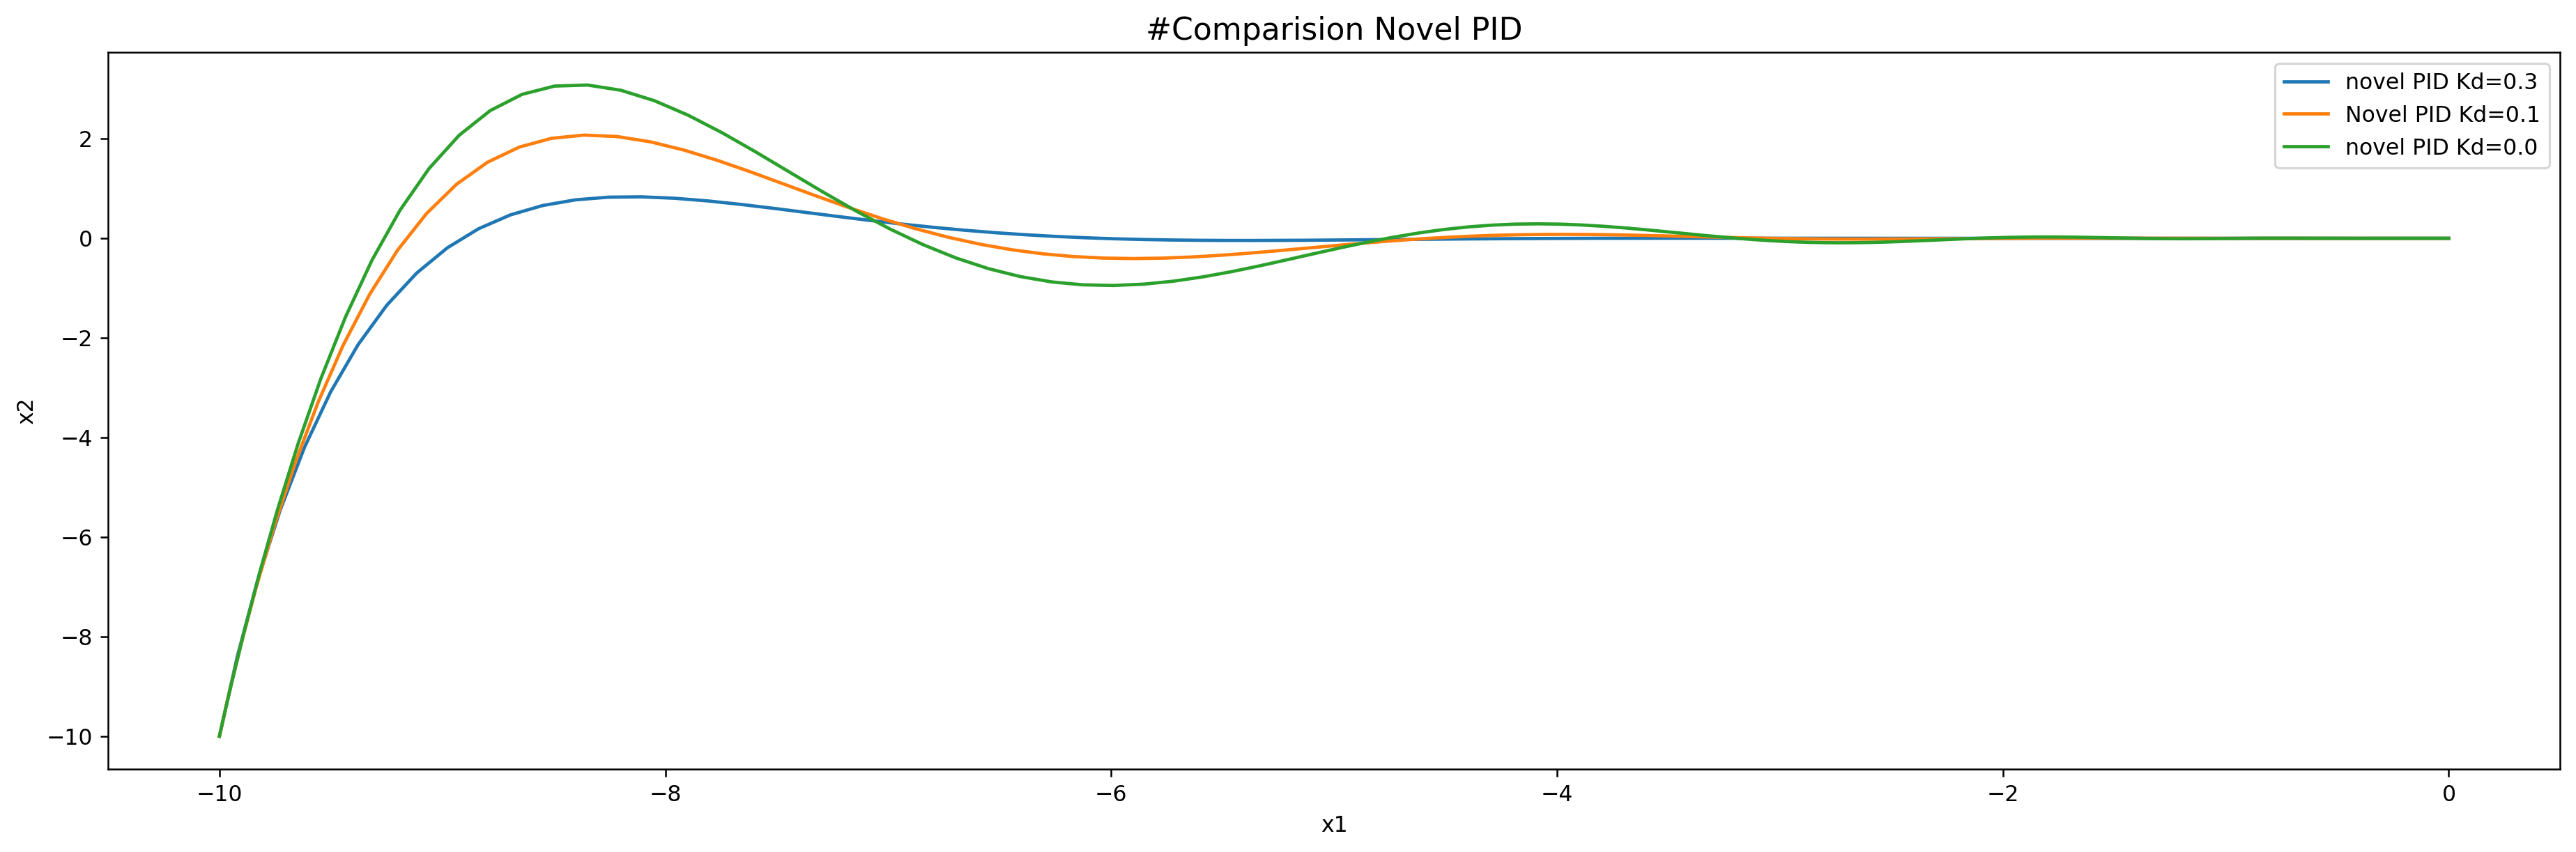

CPU times: user 895 ms, sys: 4.02 ms, total: 899 ms
Wall time: 909 ms


In [112]:
%%time

x_1 = [l[0] for l in log_2]
y_1 = [l[1] for l in log_2]

x_2 = [l[0] for l in log_21]
y_2 = [l[1] for l in log_21]

x_3 = [l[0] for l in log_22]
y_3 = [l[1] for l in log_22]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision Novel PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_1,y_1, label='novel PID Kd=0.3')
plt.plot(x_2,y_2, label='Novel PID Kd=0.1')
plt.plot(x_3,y_3, label='novel PID Kd=0.0')

plt.legend()
plt.show()

*   As Kd decreases overshoot problem increases after certain threshold for novel PID.

#Conclusion


*   Novel PID converges for larger range of Kd.
*   Overshoot present in all for large value of hyperparameter Kd.(Need to focus on how we can initialize the Kd.)
*   In all cases Adaptive PID converges well than others.
*   Our novel PID is also performing well than Classical PID.



#Work For Next Experiment:


*   will try to implement Adaptive learning rate in our Novel PID.
*   Will try to establish relation between Other Adaptive learning approach.

